In [ ]:
%pip install -q pandas -q matplotlib -q seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
analise_modelos_df = pd.read_parquet('resultados_modelos.parquet')

if 'modelo_estrategia' not in analise_modelos_df.columns:
    analise_modelos_df['modelo_estrategia'] = analise_modelos_df['modelo'] + ' - ' + analise_modelos_df['estrategia']

In [3]:
analise_modelos_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   modelo             30 non-null     object 
 1   estrategia         30 non-null     object 
 2   tempo_treinamento  30 non-null     float64
 3   n_estimators       30 non-null     int64  
 4   min_samples_split  10 non-null     float64
 5   min_samples_leaf   10 non-null     float64
 6   max_depth          30 non-null     int64  
 7   Acurácia           30 non-null     float64
 8   Precisão           30 non-null     float64
 9   Recall             30 non-null     float64
 10  F1-Score           30 non-null     float64
 11  AUC-ROC            30 non-null     float64
 12  Precisão_Classe_0  30 non-null     float64
 13  Recall_Classe_0    30 non-null     float64
 14  F1-Score_Classe_0  30 non-null     float64
 15  Precisão_Classe_1  30 non-null     float64
 16  Recall_Classe_1    30 non-nu

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_linhas_tempo(data, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    
    # Criar um gráfico de linhas para cada modelo
    for modelo in data['modelo'].unique():
        dados_modelo = data[data['modelo'] == modelo].sort_values(by='estrategia')
        plt.plot(dados_modelo['estrategia'], dados_modelo['tempo_treinamento'], 
                 marker='o', label=modelo)
    
    plt.title('Tempo de Execução por Modelo e Estratégia')
    plt.xlabel('Estratégia')
    plt.ylabel('Tempo (segundos)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Adicionar rótulos de dados
    for modelo in data['modelo'].unique():
        dados_modelo = data[data['modelo'] == modelo].sort_values(by='estrategia')
        for i, row in dados_modelo.iterrows():
            plt.text(row['estrategia'], row['tempo_treinamento'], 
                     f'{row["tempo_treinamento"]:.2f}', 
                     ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def criar_grafico_barras(data, y, title, ylabel, figsize=(20, 10), rotation=90):
    plt.figure(figsize=figsize)
    dados_ordenados = data.sort_values(by=y, ascending=False)
    sns.barplot(x='modelo_estrategia', y=y, data=dados_ordenados)
    plt.title(title)
    plt.xlabel('Modelo - Estratégia')
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


def criar_grafico_barras_lado_a_lado(data, y1, y2, title, ylabel, figsize=(20, 10), rotation=90):
    plt.figure(figsize=figsize)
    dados_ordenados = data.sort_values(by=[y1, y2], ascending=False)
    x = range(len(dados_ordenados))
    width = 0.35
    
    plt.bar(x, dados_ordenados[y1], width, label='Classe 0', alpha=0.8)
    plt.bar([i + width for i in x], dados_ordenados[y2], width, label='Classe 1', alpha=0.8)
    
    plt.xlabel('Modelo - Estratégia')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks([i + width/2 for i in x], dados_ordenados['modelo_estrategia'], rotation=rotation)
    plt.legend()
    plt.tight_layout()
    plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_pontuacao_media(data, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    
    # Calcular a pontuação média para cada modelo e estratégia
    data['pontuacao_media'] = (data['Acurácia'] + data['Precisão_Classe_0'] + data['Precisão_Classe_1']) / 3
    
    # Ordenar os dados pela pontuação média
    dados_ordenados = data.sort_values(by='pontuacao_media', ascending=False)
    
    # Criar um gráfico de barras
    sns.barplot(x='modelo_estrategia', y='pontuacao_media', data=dados_ordenados)
    
    plt.title('Pontuação Média por Modelo e Estratégia')
    plt.xlabel('Modelo - Estratégia')
    plt.ylabel('Pontuação Média')
    plt.xticks(rotation=90)
    
    # Adicionar rótulos de dados
    for i, row in dados_ordenados.iterrows():
        plt.text(i, row['pontuacao_media'], f'{row["pontuacao_media"]:.4f}', 
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

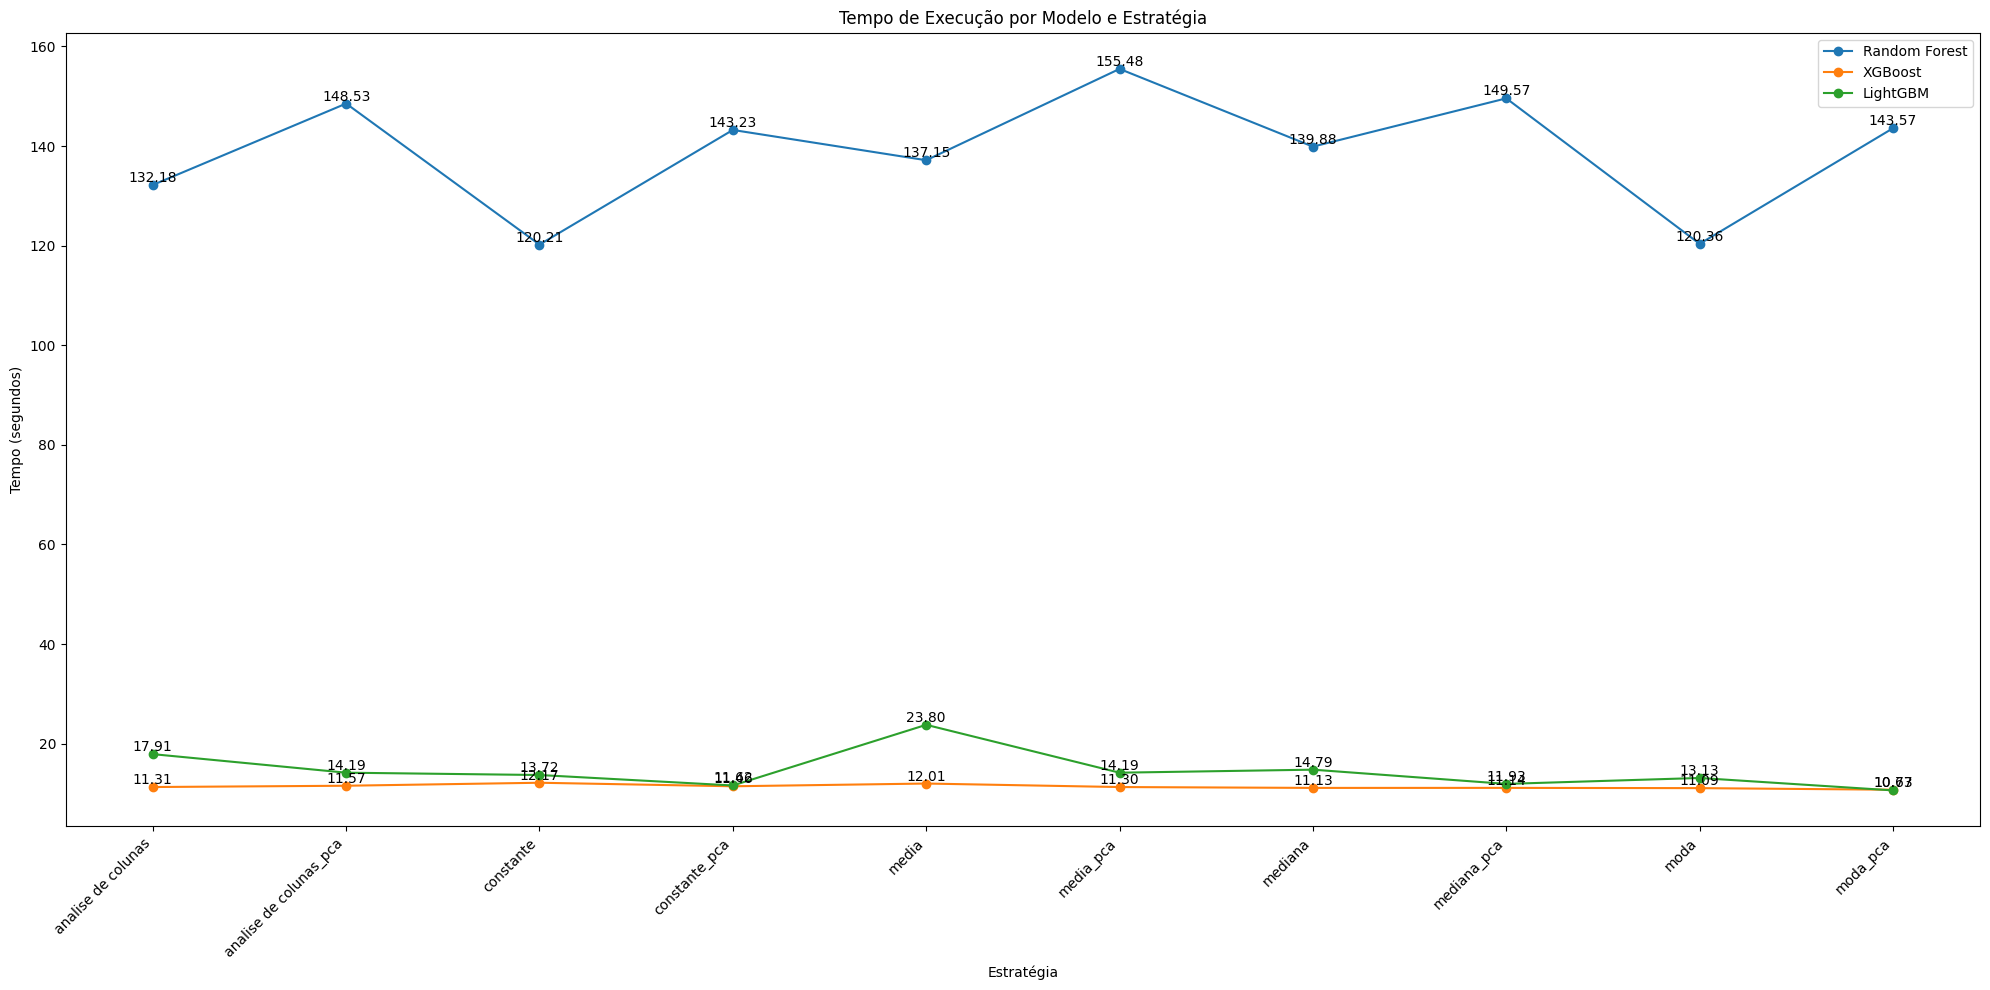

In [24]:
criar_grafico_linhas_tempo(analise_modelos_df)

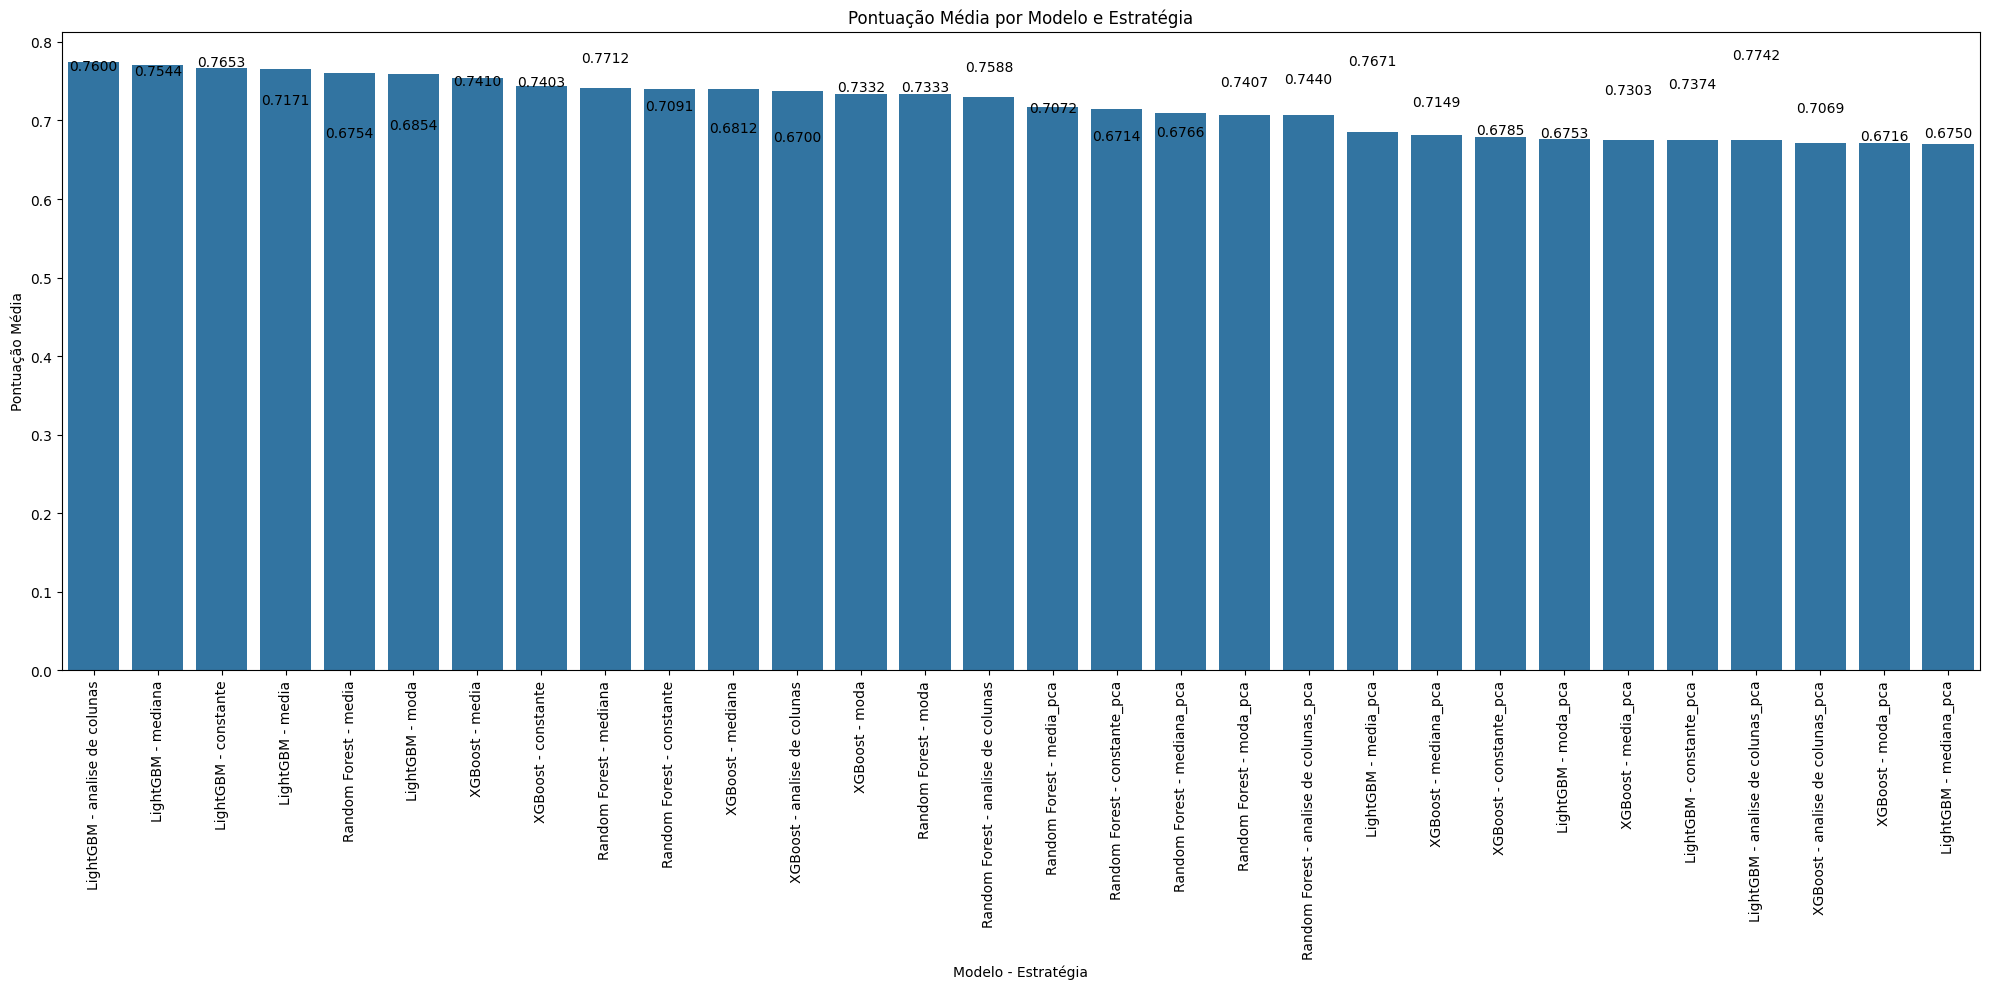

In [26]:
criar_grafico_pontuacao_media(analise_modelos_df)

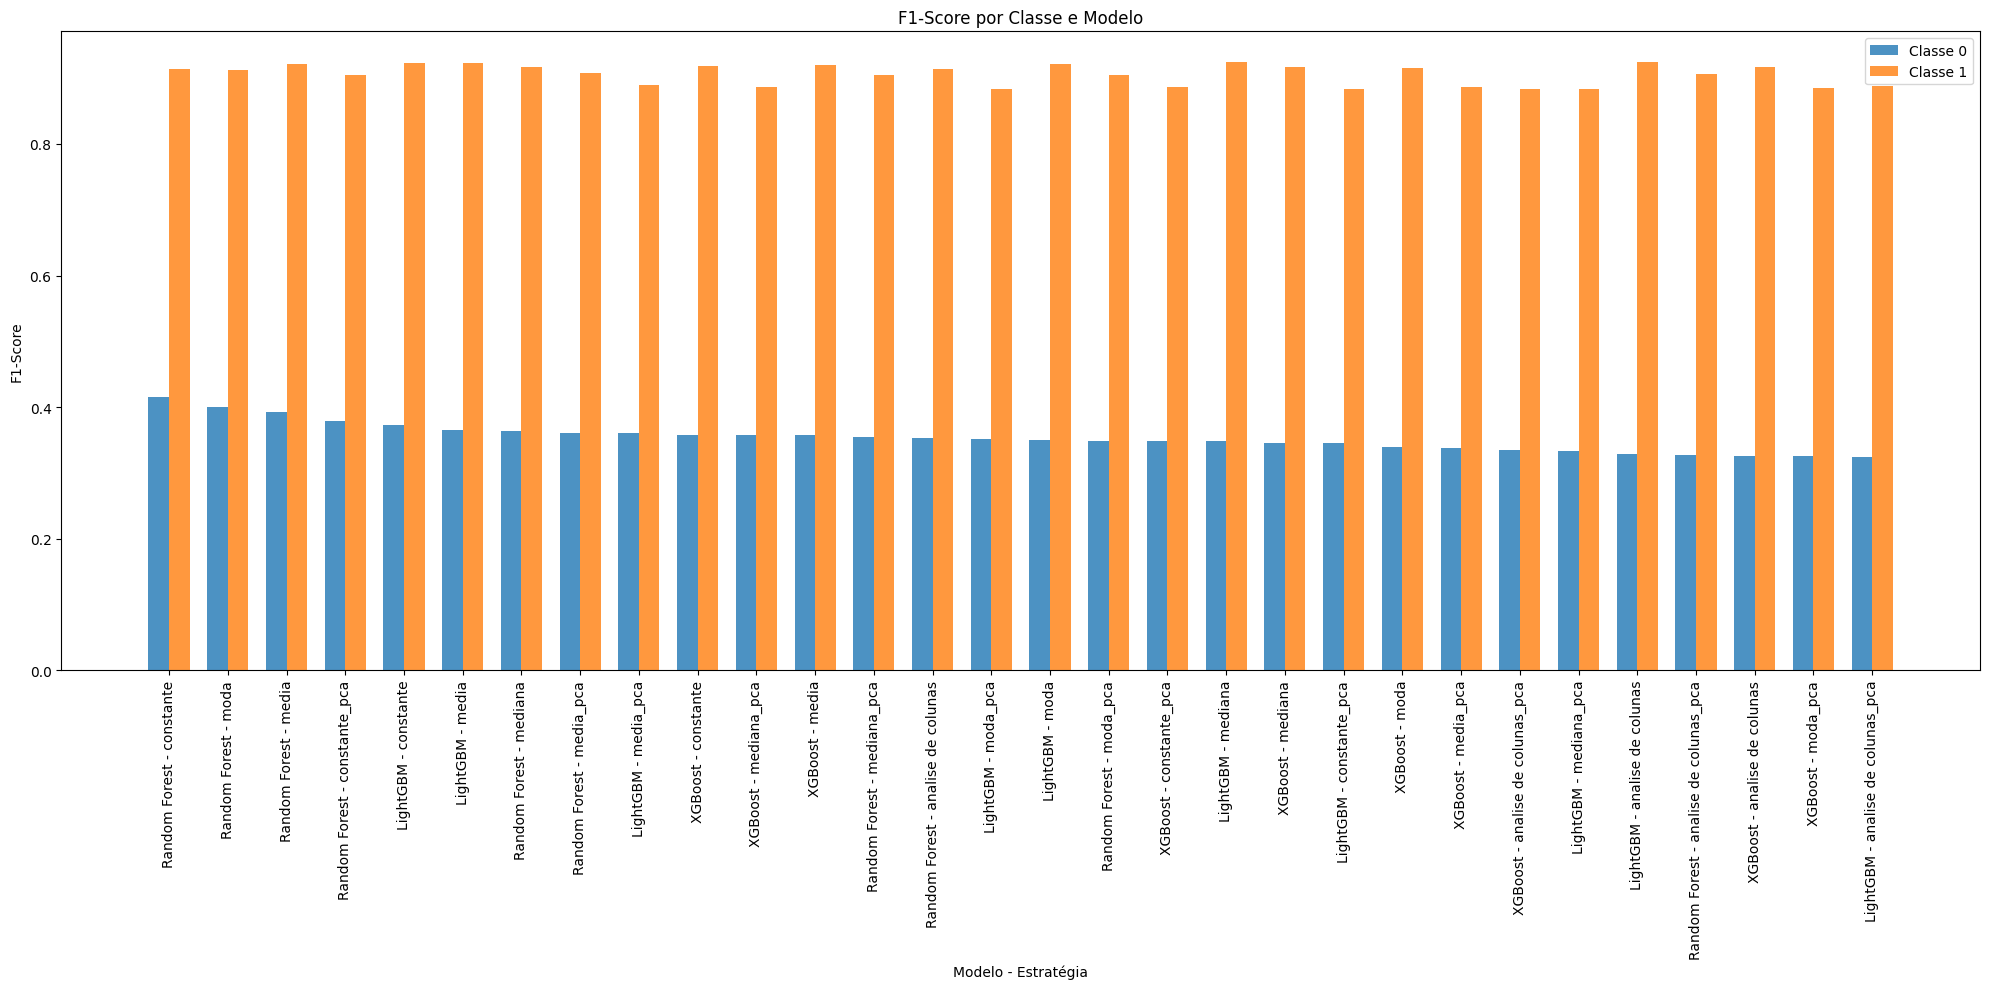

In [16]:
criar_grafico_barras_lado_a_lado(analise_modelos_df, 'F1-Score_Classe_0', 'F1-Score_Classe_1', 'F1-Score por Classe e Modelo', 'F1-Score')

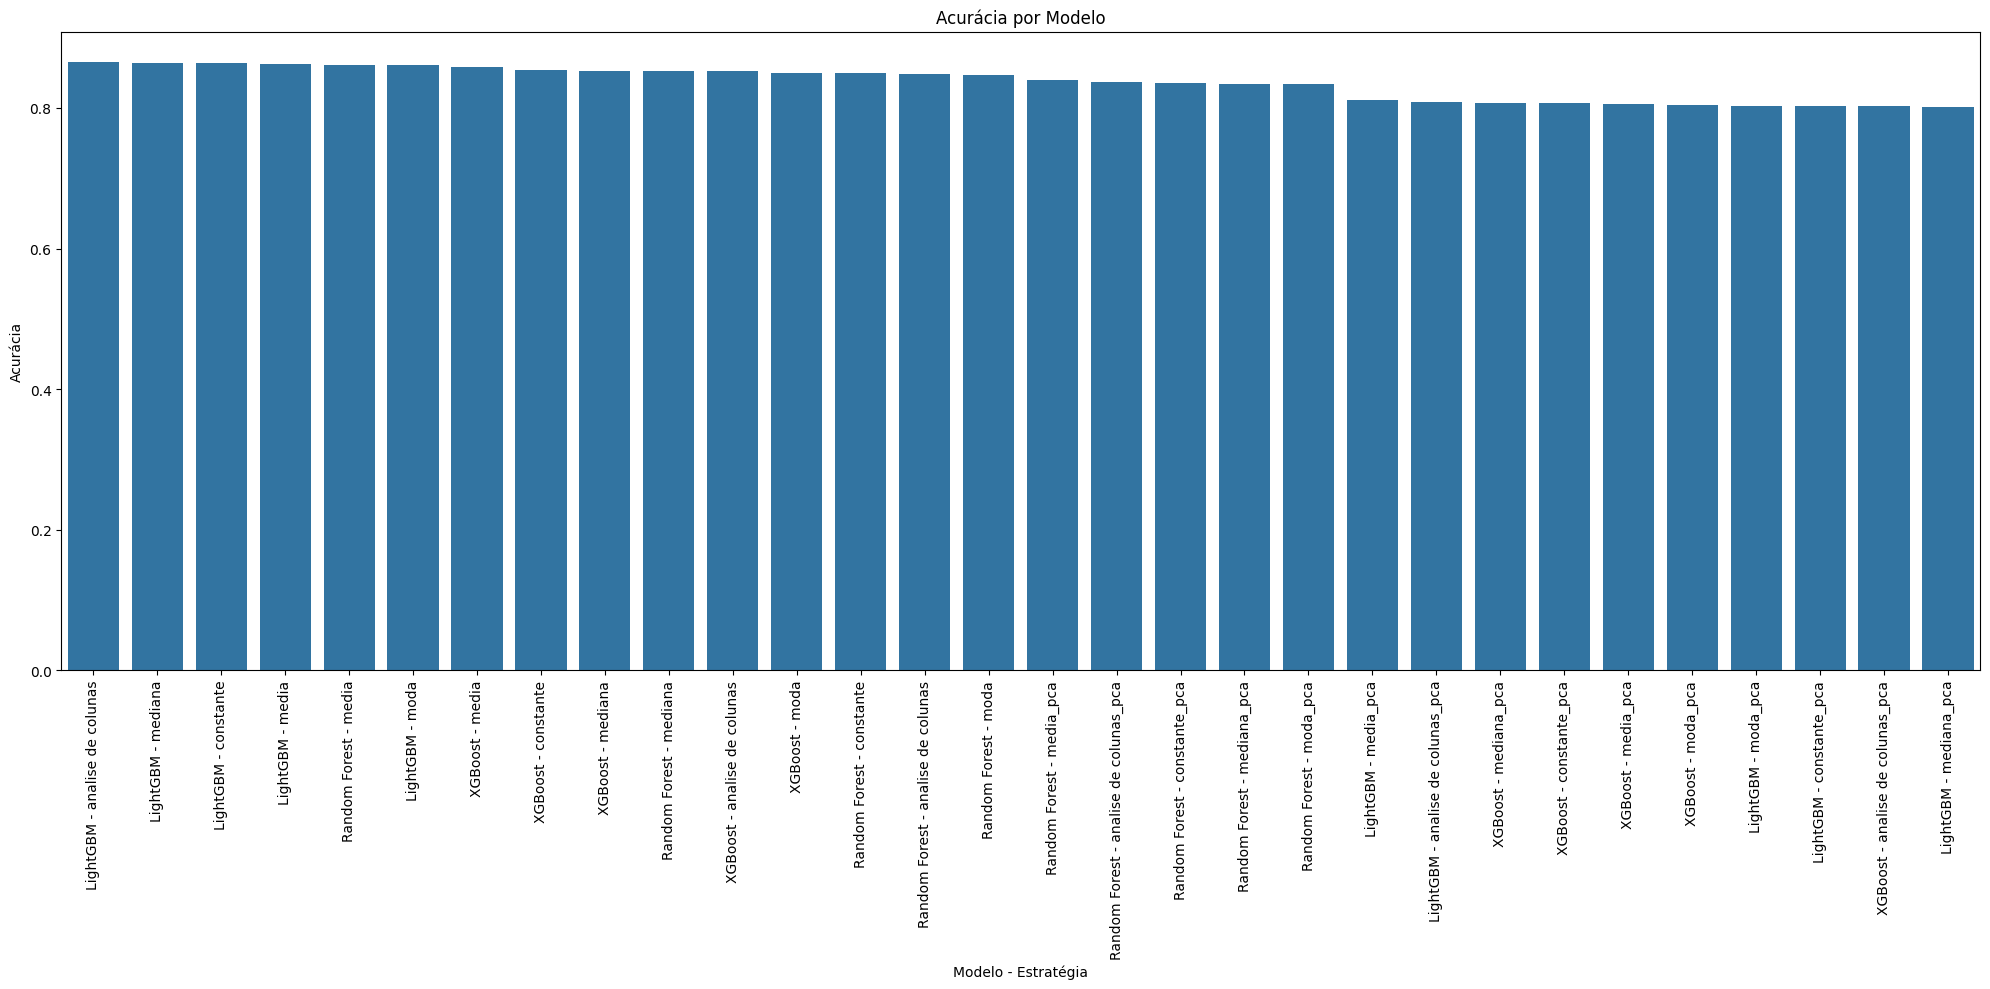

In [17]:
criar_grafico_barras(analise_modelos_df, 'Acurácia', 'Acurácia por Modelo', 'Acurácia')

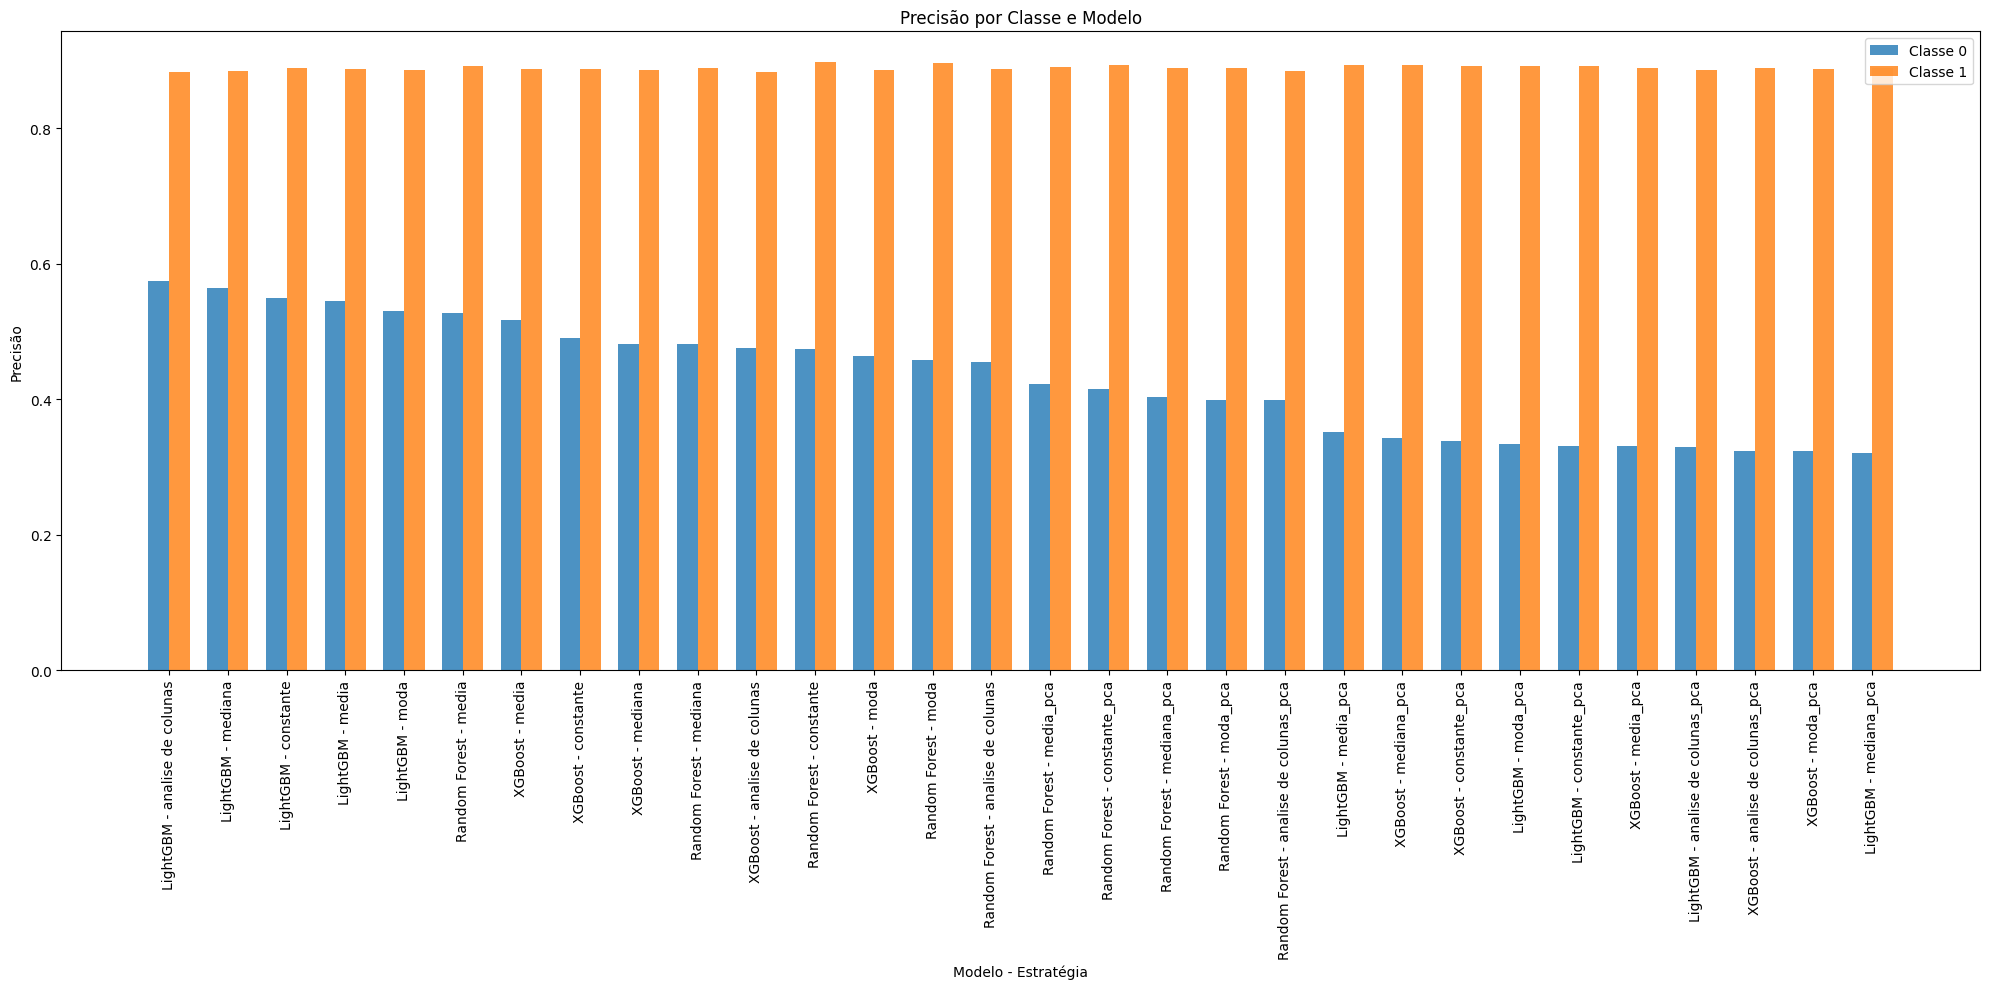

In [18]:
criar_grafico_barras_lado_a_lado(analise_modelos_df, 'Precisão_Classe_0', 'Precisão_Classe_1', 'Precisão por Classe e Modelo', 'Precisão')

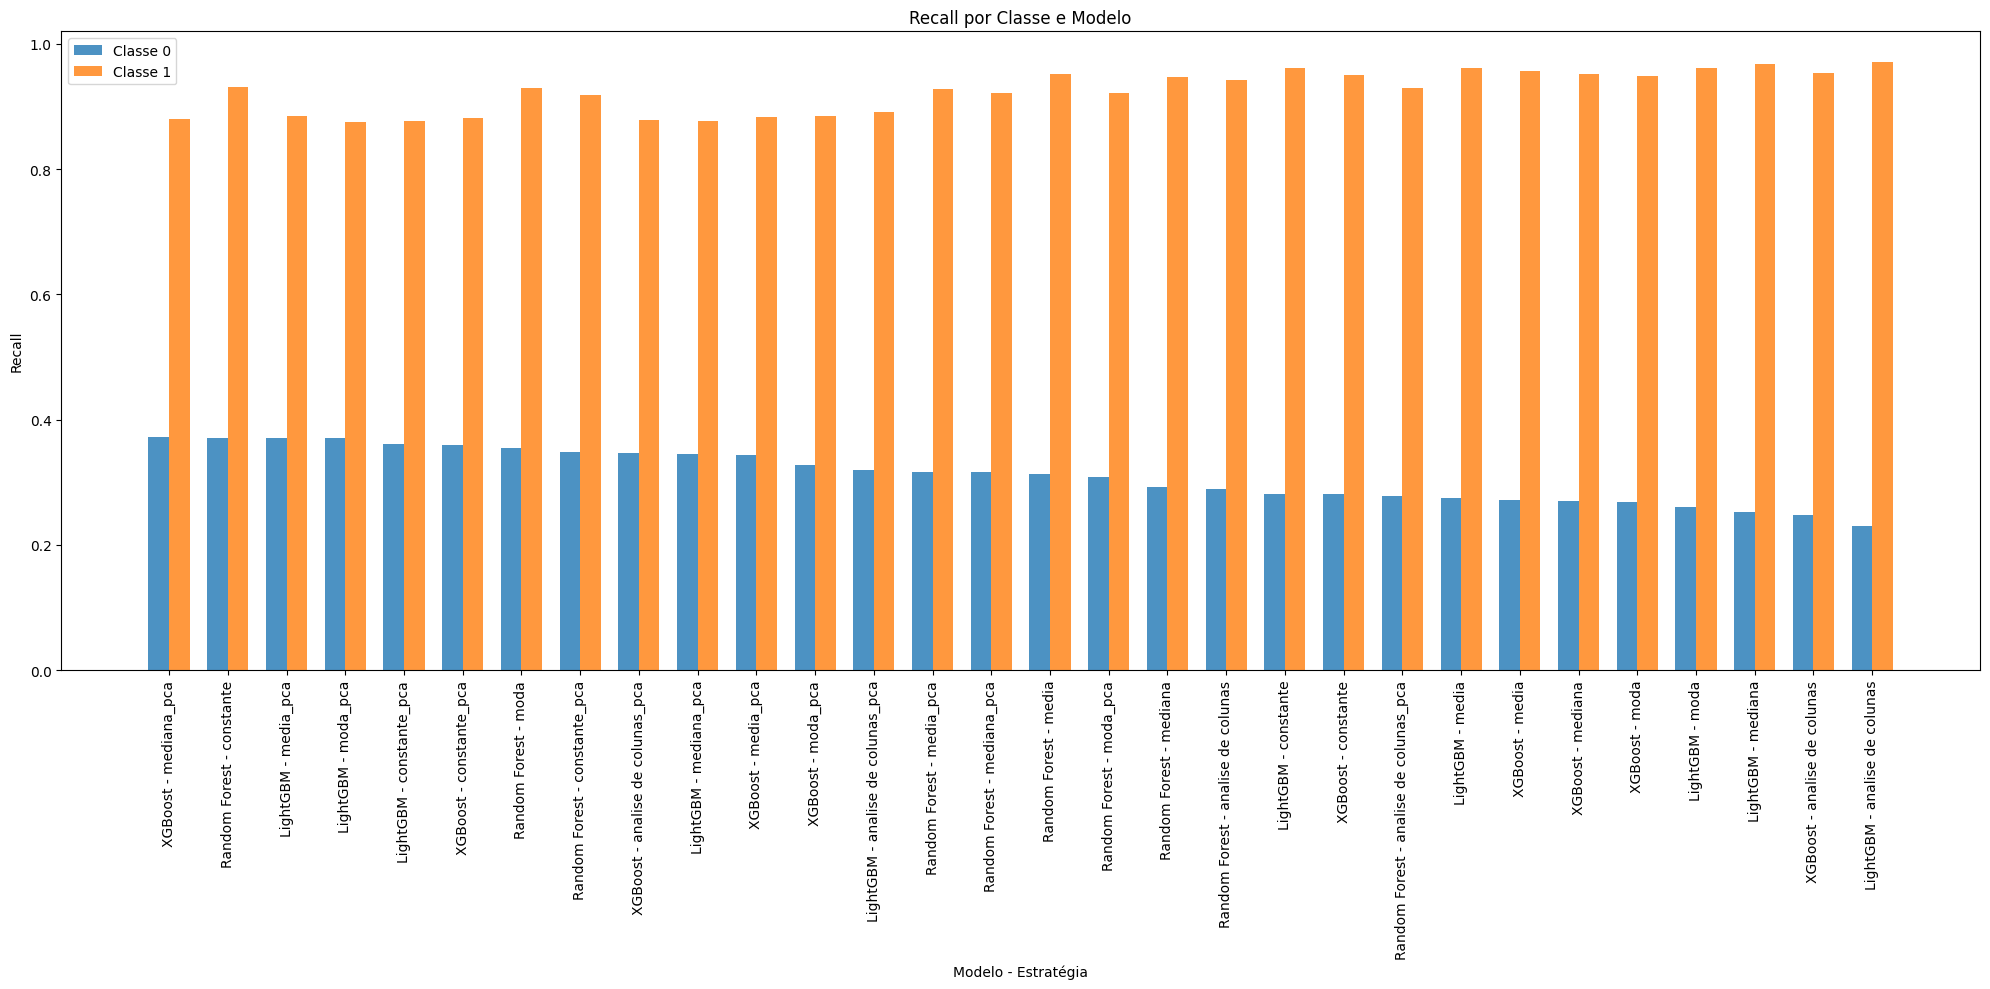

In [19]:
criar_grafico_barras_lado_a_lado(analise_modelos_df, 'Recall_Classe_0', 'Recall_Classe_1', 'Recall por Classe e Modelo', 'Recall')

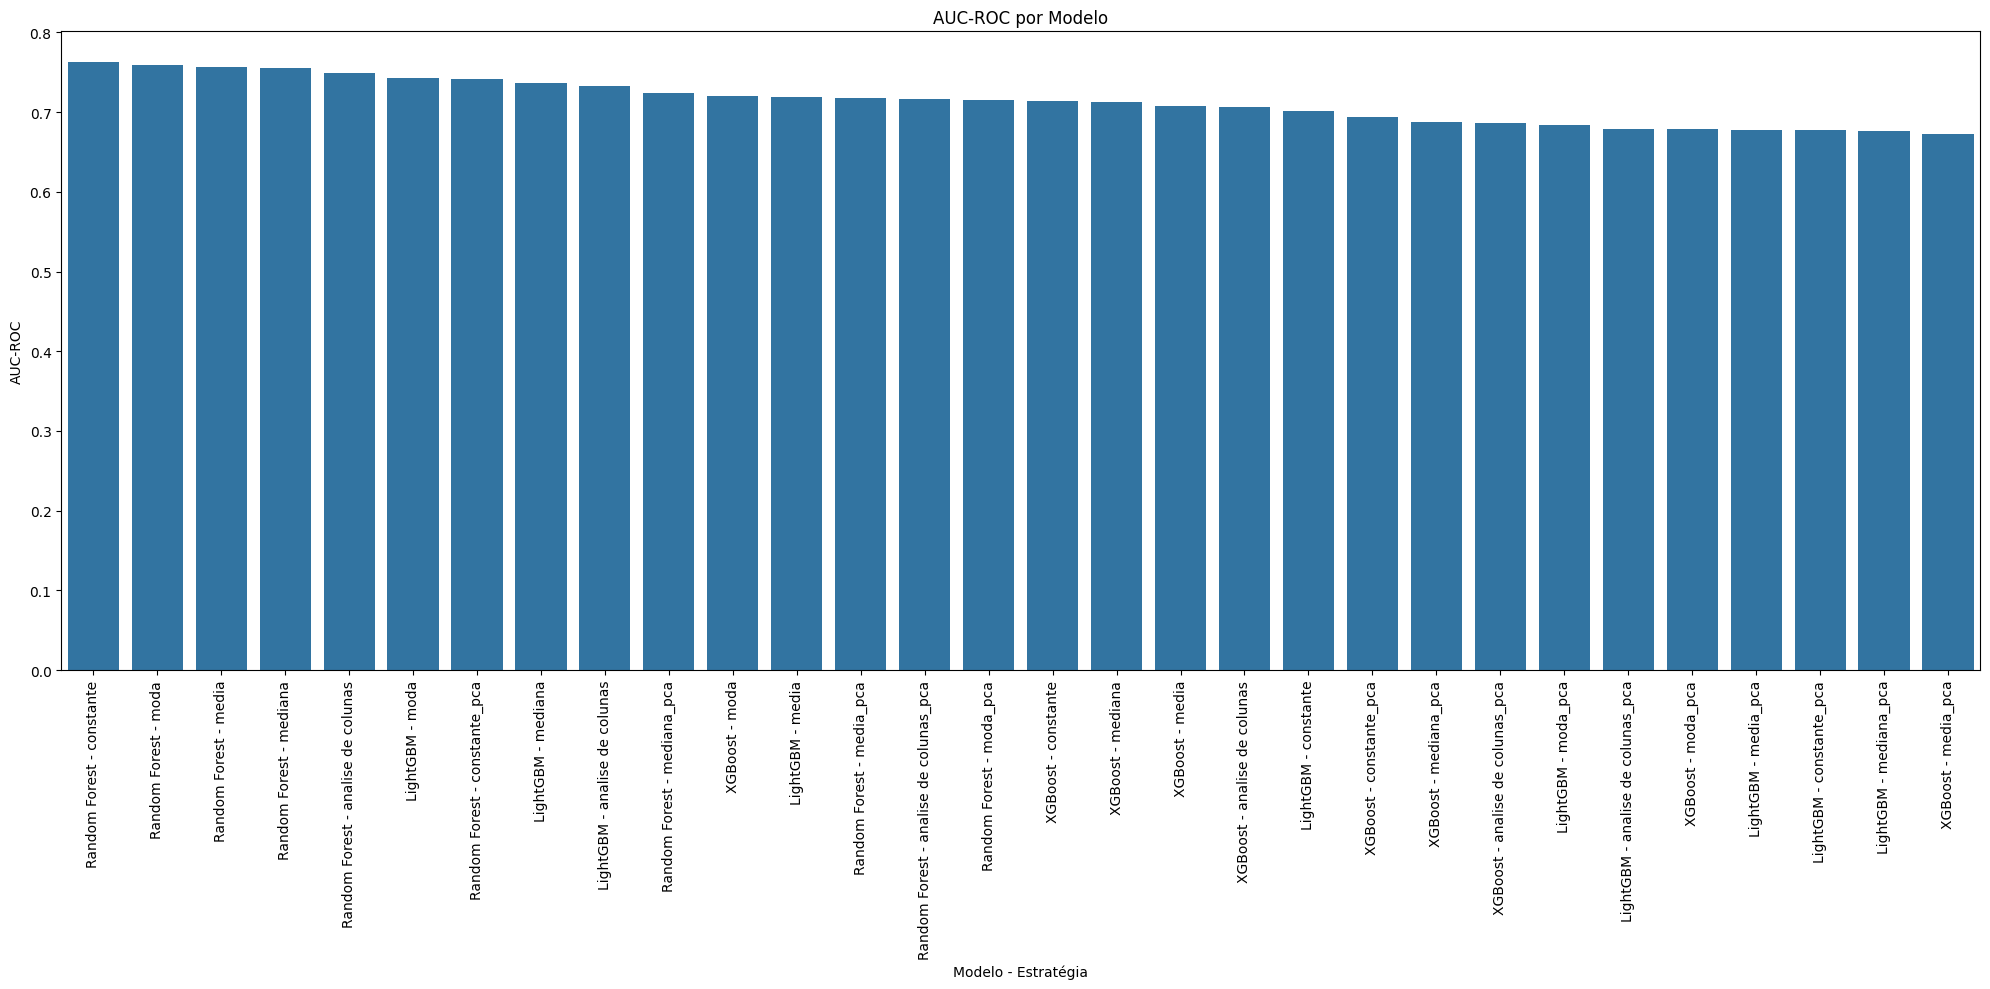

In [20]:
criar_grafico_barras(analise_modelos_df, 'AUC-ROC', 'AUC-ROC por Modelo', 'AUC-ROC')